# Assignment 1
## Group Members:
* ### Nils Dunlop, e-mail: gusdunlni@student.gu.se
* ### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
* ### Chukwudumebi Ubogu, e-mail: gusuboch@student.gu.se

### Part 1: Real estate prices

In [102]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import math

# Read csv and output descriptive statistics
df = pd.read_csv('houses.csv', header=None)

# Compute descriptive statistics
df[1].describe().apply(lambda x: format(x, 'f'))

count      100000.000000
mean       174386.753740
std        351463.397764
min           150.000000
25%         74000.000000
50%        129000.000000
75%        207000.000000
max      48465717.000000
Name: 1, dtype: object

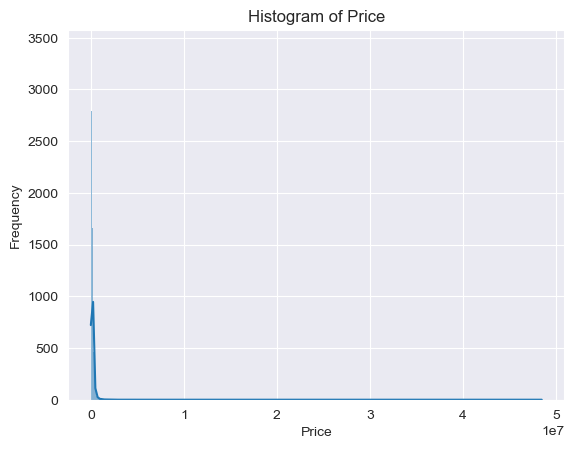

In [103]:
# Plotting a histogram of the price
sns.histplot(df[1], kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram of Price reveals the presence of outliers, which can negatively impact the creation of a meaningful histogram. Therefore, we removed these outliers by using the IQR (Interquartile Range) Method to ensure an accurate representation of the data in the histogram. 

An alternative approach might involve implementing a log-scale for the x-axis. However, this comes with certain drawbacks. Firstly, our usual thought processes typically align with linear scales, and secondly, interpreting data on a log-scale can be challenging. Additionally, a potential disadvantage is the risk of misrepresentation, as the log-scale has the tendency to make the data appear more normal than its actual distribution.

In [104]:
# Calculate the first quartile (Q1)
q1 = df[1].quantile(0.25)

# Calculate the third quartile (Q3)
q3 = df[1].quantile(0.75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Calculate the lower limit for outliers
lower_lim = q1 - 1.5 * iqr

# Calculate the upper limit for outliers
upper_lim = q3 + 1.5 * iqr

# Identify outliers below the lower limit
outliers_low = (df[1] < lower_lim)

# Identify outliers above the upper limit
outliers_up = (df[1] > upper_lim)

In [105]:
outliers_low.value_counts() # There are no outliers below the lower limit

False    100000
Name: 1, dtype: int64

In [106]:
outliers_up.value_counts() # There are 5671 outliers above the upper limit

False    94329
True      5671
Name: 1, dtype: int64

In [107]:
df_no_outliers = df[~outliers_up]

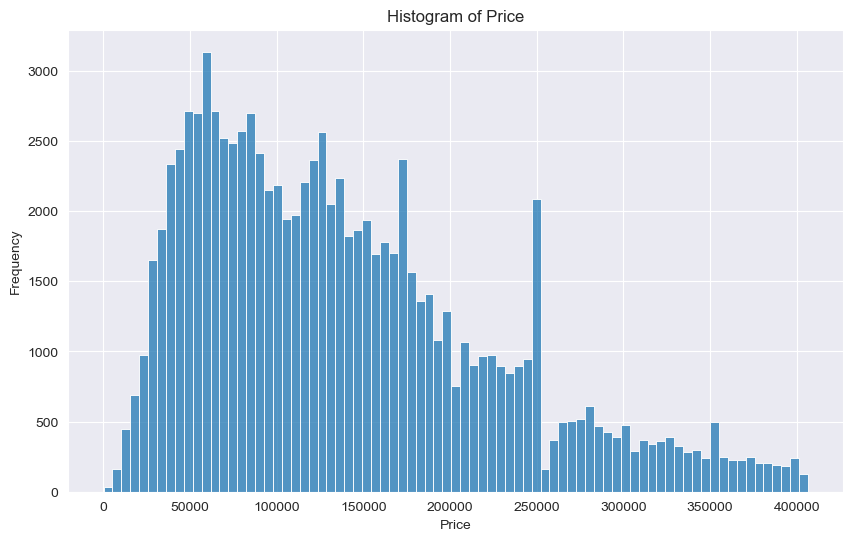

In [108]:
# Plot histogram of price without outliers
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers[1],bins="fd")
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In the context of determining the number of bins for our histogram, we explored the methods available within the histplot function when the bins parameter is not explicitly defined. Notably, two approaches were considered: Sturge's Rule and the Freedman-Diaconis Estimator.

Sturge's Rule, a common heuristic, calculates the number of bins as 1 + log2(N), where N is the total number of observations in our dataset. While Sturge's Rule is a straightforward method, it may overestimate bin width for very large datasets, resulting in oversmoothed histograms. It suitable for datasets with a size of 200 or less.

Given our dataset's substantial size, comprising 100,000 observations, we opted for the Freedman-Diaconis Estimator. This method takes into account data variability and data size. The selection of the Freedman-Diaconis Estimator aims to provide a more accurate representation of the data distribution in our histogram visualization.  
![Math Formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/a80f81da3e4a82713b8a80c981b151d5d7aea241)


**References:**
1. [Sturges' rule by David W. Scott](https://wires.onlinelibrary.wiley.com/doi/10.1002/wics.35)
2. [The problem with Sturges’ rule for constructing histograms by Rob J Hyndman](https://robjhyndman.com/papers/sturges.pdf)
3. [How to decide on the number of bins of a Histogram](https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8)
4. [Histogram Bin Edges](https://numpy.org/devdocs/reference/generated/numpy.histogram_bin_edges.html)

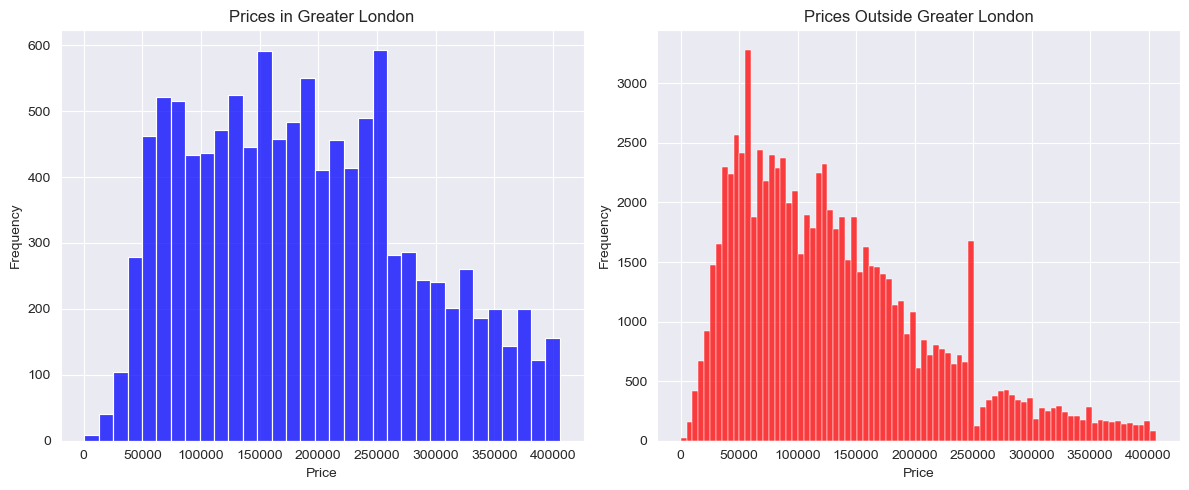

In [109]:
# Create two dataframes: one for prices in Greater London and one for prices outside Greater London
london_df = df_no_outliers[df_no_outliers[13] == 'GREATER LONDON']
outside_london_df = df_no_outliers[df_no_outliers[13] != 'GREATER LONDON']

plt.figure(figsize=(12, 5))
# Plot histogram of prices in Greater London
plt.subplot(1, 2, 1)
sns.histplot(london_df[1], color='blue',bins="fd")
plt.title('Prices in Greater London')
plt.xlabel('Price')
plt.ylabel('Frequency')
# Plot histogram of prices outside Greater London
plt.subplot(1, 2, 2)
sns.histplot(outside_london_df[1], color='red',bins="fd")
plt.title('Prices Outside Greater London')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Description:** The histograms show us that in Greater London, most houses are not too pricey but there are quite a few that are really expensive given that the graph stretches out to the right. For houses outside Greater London, the prices also spread out to the right, but not as much. This tells us that while you can find expensive houses there too, they're not as common as in Greater London. Overall, it looks like houses tend to be cheaper outside of Greater London

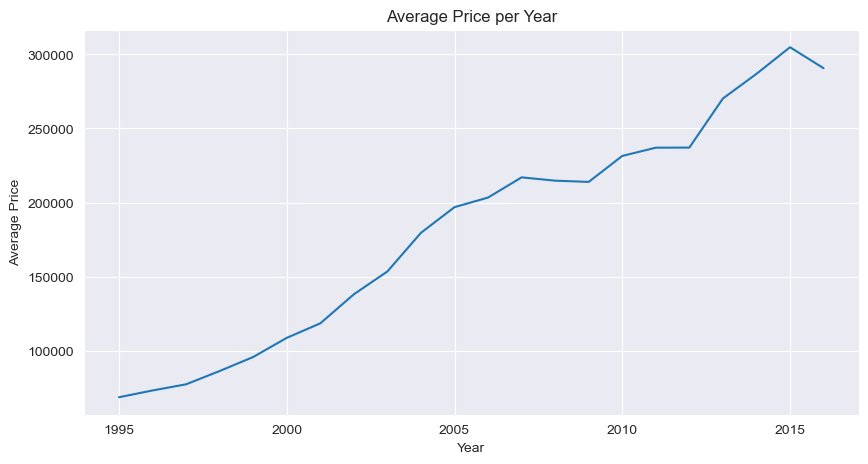

In [110]:
# Change the type of the date column to datetime format
df[2] = pd.to_datetime(df[2])

# Create a new column with the year
df['year'] = df[2].dt.year

# Group by year and calculate the mean price for each year
df_year = df.groupby('year')[1].mean().reset_index()

# Plot the mean price for each year
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_year, x='year', y=1)
plt.title('Average Price per Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

**Description:** The chart tracks the average house prices over time and shows that they have been on the rise. Back in 1995, houses were much cheaper. But since then, the prices have been climbing up pretty steadily. It is noticeable that around 2010, they started to shoot up even faster indicating that buying a house has become more expensive especially in recent years.

### Part 2: Histogram and quantile

#### (a) Identify the data types of these four columns and plot their distributions

In [111]:
titanic_df = pd.read_csv('titanic_train.csv')

analyze_columns = ["Embarked", "Pclass", "Parch", "Fare"]
sub_titanic_df = titanic_df[analyze_columns]
sub_titanic_df

,Embarked,Pclass,Parch,Fare
0,S,3,0,7.2500
1,C,1,0,71.2833
2,S,3,0,7.9250
3,S,1,0,53.1000
4,S,3,0,8.0500
...,...,...,...,...
886,S,2,0,13.0000
887,S,1,0,30.0000
888,S,3,2,23.4500
889,C,1,0,30.0000


The data types of the four columns are as follows:

* **Embarked**: Categorical, Nominal Data. This column represents the port where a passanger took the ship, "S", "C" and "Q", are categories without a specific order. 
* **Pclass**: Categorical, Ordinal Data. This column indicates the class in which each passanger traveled: 1st class, 2nd class, and 3rd class. These categories follow a order, being 1st class the top category and 3rd class the bottom one. However, the differences between classes are not necessarily uniform.
* **Parch**: Numerical, Discrete (interval) Data. This column shows the number of parents or children on the ship for each passanger. These values can be counted and do not follow a strict order.
* **Fare**: Numerical, Continuous (ratio) Data. This column represents the amount paid by each passanger for getting their ticket. The fare can take a wide range of continuous values (with decimal precision). Also, these values are uncountable. 

#### (b) Histogram

In [112]:
# Histogram for Parch
parch_counts = dict(Counter(sub_titanic_df['Parch']))
print("Histogram for Parch:", parch_counts)

# Validate with np.histogram
values, bins = np.histogram(sub_titanic_df['Parch'], bins=np.arange(-0.5, sub_titanic_df['Parch'].max()+1.5))
print("Validation using np.histogram for Parch:", dict(zip(bins[:-1], values)))

# Histogram for Fare with 20 bins
fare_range = (sub_titanic_df['Fare'].min(), sub_titanic_df['Fare'].max())
fare_bins = np.linspace(fare_range[0], fare_range[1], 21)
fare_hist = {f"({fare_bins[i]}, {fare_bins[i+1]})": 0 for i in range(20)}

for fare in sub_titanic_df['Fare']:
    for i in range(20):
        if fare_bins[i] <= fare < fare_bins[i+1]:
            fare_hist[f"({fare_bins[i]}, {fare_bins[i+1]})"] += 1
            break

print("\nHistogram for Fare:", fare_hist)

# Validate with np.histogram
values, _ = np.histogram(sub_titanic_df['Fare'], bins=fare_bins)
print("\nValidation using np.histogram for Fare:", dict(zip(fare_bins[:-1], values)))

Histogram for Parch: {0: 678, 1: 118, 2: 80, 5: 5, 3: 5, 4: 4, 6: 1}
Validation using np.histogram for Parch: {-0.5: 678, 0.5: 118, 1.5: 80, 2.5: 5, 3.5: 4, 4.5: 5, 5.5: 1}

Histogram for Fare: {'(0.0, 25.61646)': 562, '(25.61646, 51.23292)': 170, '(51.23292, 76.84938)': 67, '(76.84938, 102.46584)': 39, '(102.46584, 128.0823)': 15, '(128.0823, 153.69876)': 16, '(153.69876, 179.31522)': 2, '(179.31522, 204.93168)': 0, '(204.93168, 230.54814)': 9, '(230.54814, 256.1646)': 2, '(256.1646, 281.78106)': 6, '(281.78106, 307.39752)': 0, '(307.39752, 333.01398)': 0, '(333.01398, 358.63044)': 0, '(358.63044, 384.2469)': 0, '(384.2469, 409.86336)': 0, '(409.86336, 435.47982)': 0, '(435.47982, 461.09628)': 0, '(461.09628, 486.71274)': 0, '(486.71274, 512.3292)': 0}

Validation using np.histogram for Fare: {0.0: 562, 25.61646: 170, 51.23292: 67, 76.84938: 39, 102.46584: 15, 128.0823: 16, 153.69876: 2, 179.31522: 0, 204.93168: 9, 230.54814: 2, 256.1646: 6, 281.78106: 0, 307.39752: 0, 333.01398: 0, 3

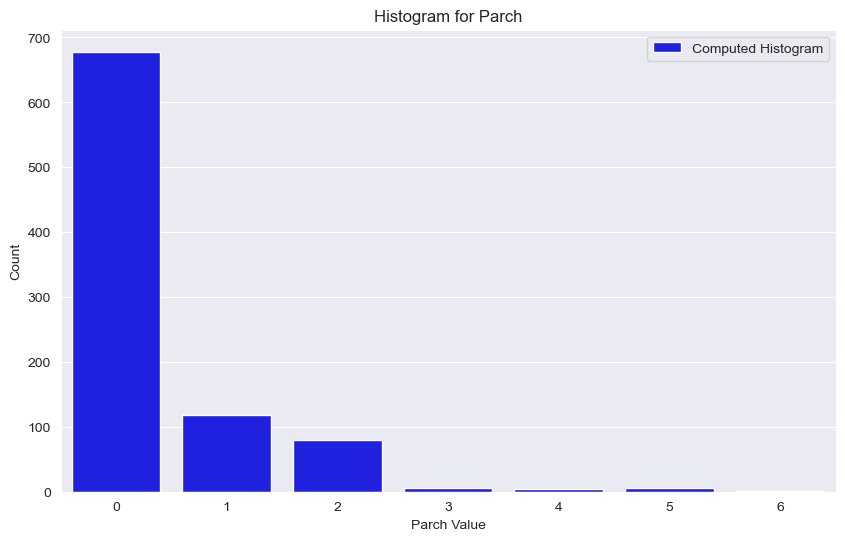

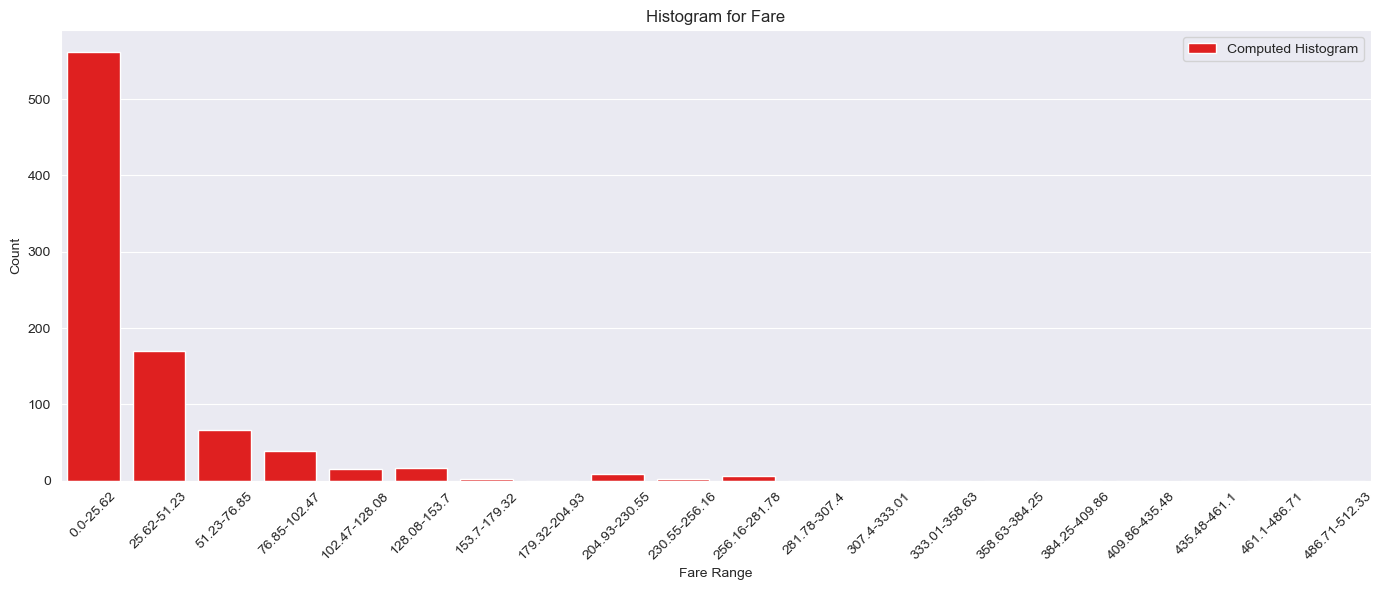

In [113]:
# Plotting histogram for Parch
plt.figure(figsize=(10, 6))
sns.barplot(x=list(parch_counts.keys()), y=list(parch_counts.values()), color='blue', label='Computed Histogram')
plt.xlabel('Parch Value')
plt.ylabel('Count')
plt.title('Histogram for Parch')
plt.legend()
plt.show()

# Plotting histogram for Fare
plt.figure(figsize=(14, 6))
fare_labels = [f"{round(fare_bins[i], 2)}-{round(fare_bins[i+1], 2)}" for i in range(20)]
sns.barplot(x=fare_labels, y=list(fare_hist.values()), color='red', label='Computed Histogram')
plt.xlabel('Fare Range')
plt.ylabel('Count')
plt.title('Histogram for Fare')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()

**Description:** The histogram for Parch shows that most passangers did not have any parents or children on the ship. The second most common value is 1, meaning that most passangers had either one parent or one child on the ship. The histogram for Fare shows that most passangers paid between 0 and 25.62 for their ticket. The second most common value is between 25.62 and 51.23.

#### (c) Data quantile

In [114]:
# Define the quantile values
quantiles = [0.2, 0.5]

# Sort the data in ascending order
sorted_fares = sorted(sub_titanic_df['Fare'])

def custom_quantile(sorted_data, p):
    n = len(sorted_data)
    index = (n-1) * p
    lower_index = math.floor(index)
    upper_index = math.ceil(index)
    
    if lower_index == upper_index:
        return sorted_data[int(index)]
    else:
        return 0.5 * (sorted_data[lower_index] + sorted_data[upper_index])

q_02 = custom_quantile(sorted_fares, quantiles[0])
q_05 = custom_quantile(sorted_fares, quantiles[1])

assert q_02 == np.quantile(sub_titanic_df['Fare'], 0.2), "Quantile for p=0.2 does not match!"
assert q_05 == np.quantile(sub_titanic_df['Fare'], 0.5), "Quantile for p=0.5 does not match!"

### Part 3: Generating data from probabilistic models

#### (a) Consider the random number generation functions in NumPy

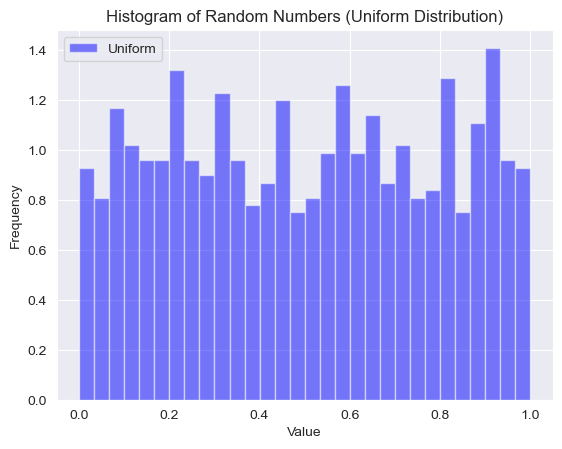

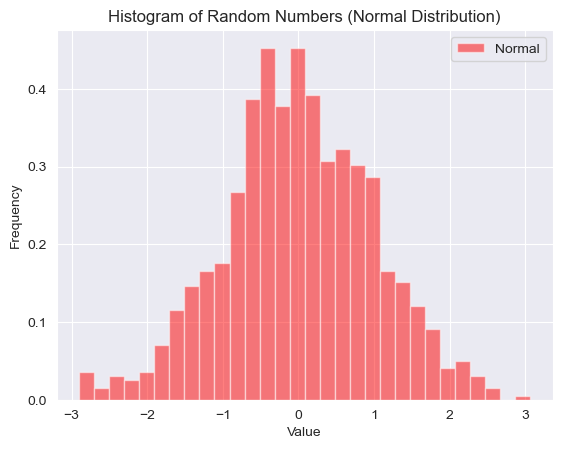

In [115]:
# Generate a set of random numbers using the uniform distribution
random_numbers_uniform = np.random.rand(1000)

# Plot the histogram for the uniform distribution
plt.hist(random_numbers_uniform, bins=30, density=True, alpha=0.5, color='blue', label='Uniform')
plt.title('Histogram of Random Numbers (Uniform Distribution)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Generate a set of random numbers using Normal distribution
random_numbers_normal = np.random.normal(0, 1, 1000) 

# Plot the histogram for the normal distribution
plt.hist(random_numbers_normal, bins=30, density=True, alpha=0.5, color='red', label='Normal')
plt.title('Histogram of Random Numbers (Normal Distribution)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Description:** The histogram for the uniform distribution shows that the values are evenly distributed between 0 and 1. The histogram for the normal distribution shows that the values are concentrated around 0 and that the distribution is symmetric.

#### (b) Modeling a student at an exam

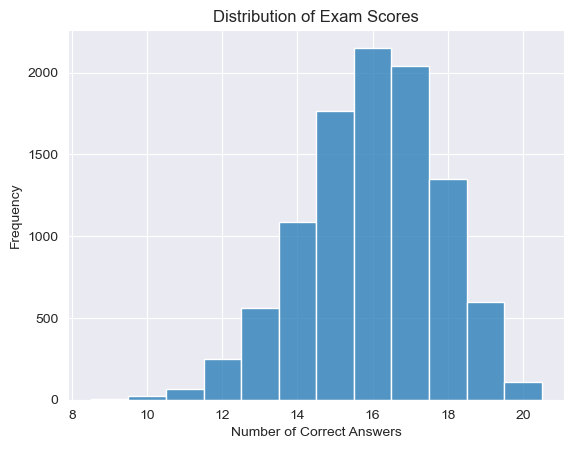

In [116]:
# Defining methods to model a student exam
def success(p_success):
    return bool(np.random.choice([0, 1], p=[1-p_success, p_success]))

def exam_score(p_correct, n_instances):
    correct_answers = sum(success(p_correct) for _ in range(n_instances))
    return correct_answers

# Parameters
p_correct = 0.8
n_instances = 20
n_simulations = 10000

# Simulation
results = [exam_score(p_correct, n_instances) for _ in range(n_simulations)]

# Plot histogram
sns.histplot(results, bins=n_instances, kde=False, discrete=True)
plt.xlabel('Number of Correct Answers')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')
plt.show()

**Description:** The histogram shows that most students got between 14 and 18 answers correct. The least common score was 10, meaning that no student got all answers wrong. The second least common score was 20, meaning that only a very few students got all answers correct. The most common score was 16 correct answers.

#### (c) The persistent student

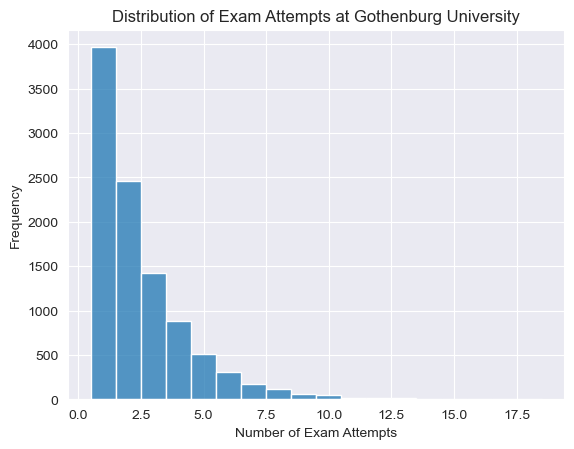

In [117]:
def number_of_attempts(p_pass):
    attempts = 0
    while not success(p_pass):
        attempts += 1
    else: 
        return attempts + 1

# Simulation parameters
a_correct = 0.4
attempt_results = [number_of_attempts(a_correct) for _ in range(n_simulations)]

# Plot histogram
sns.histplot(attempt_results, bins=n_instances, kde=False, discrete=True)
plt.xlabel('Number of Exam Attempts')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Attempts at Gothenburg University')
plt.show()

**Description:** The histogram shows that most students passed the exam on their first attempt. The second most common number of attempts was 2, meaning that most students passed the exam on their first or second attempt. The least common number of attempts was 10, meaning that only a very few students needed 10 attempts to pass the exam. The most common number of attempts was 1.

### Part 4: Exploring new visualization techniques for data analysis

**What is alternative text? Why is alternative text important in data visualization?**

Alternative text, often known to as "alt text," is a brief description that you can assign to something visual like an image, chart, graph, or any other kind of visual data representation. Alt text serves the critical purpose of conveying the content and meaning of these visual elements to individuals who may face challenges in perceiving visual information. It also allows people to enhance their comprehension of the content, context, and purpose of the visual elements.


#### 1. Stacked Column Plot

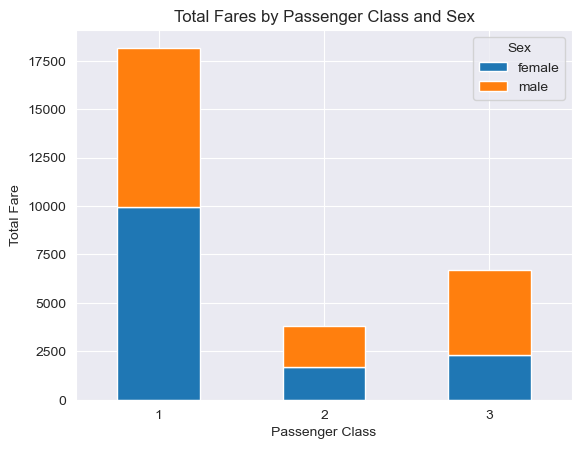

In [118]:
# Group the data by Pclass and Sex, and calculate the total sum of fares for each group
grouped_data = titanic_df.groupby(['Pclass', 'Sex'])['Fare'].sum().reset_index()

# Pivot the data to create a table with Pclass as the index, Sex as the columns, and Fare as the values
pivot_table = grouped_data.pivot(index='Pclass', columns='Sex', values='Fare')

# Create a stacked column chart
pivot_table.plot(kind='bar', stacked=True)

# Set the title and axis labels
plt.title('Total Fares by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)

# Show the chart
plt.show()

**Alternative Text:** *The Stacked Column Chart visually breaks down fare revenue by passenger class and gender, highlighting first class as the major contributor with around 18,000, where females spent slightly more than males. The second highest contributor to revenuest was third class with approximately 7,000, and males led in ticket expenditures. The second class fares contributed the least to total revenue. THe latter contributed around 3,000, with males again spending more one their tickets. This concise analysis underscores fare distribution disparities across classes and gender-specific spending patterns, aiding financial insights and decision-making for the ship company.*

**Characteristic of the data this visualization highlights:**  
In this graph, we examine the impact of each passenger class on the total revenue of the ship company for that particular trip. 

**Insights and Conclusions:**  
We observe that first class had the most significant contribution to income, with approximately 18,000 collected in fares. Interesting to note is that females in this class spent slightly more on their tickets than males. The next most contributing class was the third class, which accumulated around 7,000 in fares. In this class, it was males who spent the most on their tickets. Finally, the second class had the least contribution to total fares, amounting to approximately 3,000. In this class as well, males were the ones who spent more on their tickets.

In conclusion, the data highlights the uneven distribution of fare contributions across different passenger classes and the spending variations between genders within these classes. This analysis provides valuable insights into the revenue patterns for the ship company during this specific trip.

#### 2. Count Plot

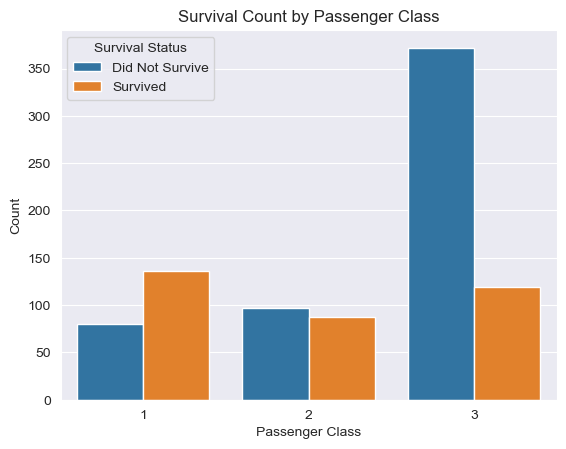

In [119]:
# Map the 'Survived' column to a new column with string labels
titanic_df['Survival_Status'] = titanic_df['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})

# Create a count plot with the updated labels
sns.countplot(x='Pclass', hue='Survival_Status', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survival Status')
plt.show()

**Alternative Text:** *The count plot depicts the survival count by passenger class on the Titanic. It shows two sets of bars for each of the three passenger classes, indicating the number of people who did not survive and those who survived. The first class has a higher survival count compared to those who did not survive, while the second and third classes have higher counts of non-survivors. The third class shows the largest number of non-survivors compared to the first and second classes.*

**Characteristic of the data this visualization highlights:**  
The count plot depicting survival by passenger class on the Titanic reveals distinct patterns in the distribution of survival and non-survival counts.

**Insights and Conclusions:**  
Eye balling the graph suggests a positive correlation between passenger class and the likehood of survival. Notably, the first class stands out with a higher share of first class passengers surviving than not surviving. In second class, the survival count is only slightly lower than non-survivors, suggesting an approximately equal chance of survival than not in this class. However, the most notable pattern emerges in the third class, where the count of non-survivors significantly outweighs that of survivors. This indicates a markedly lower survival rate of less than 30 per cent. Overall, the chart vividly illustrates the pronounced disparities in survival rates between the various passenger classes on board the Titanic.

#### 3. Violin Plot

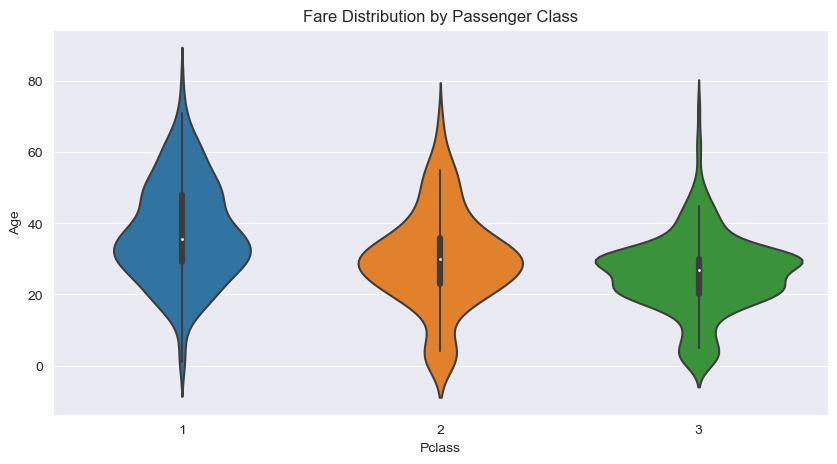

In [120]:
# Create a violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x='Pclass', y='Age', data=titanic_df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

**Alternative Text:** *The Violin plot visually depicts the age distribution across different passenger classes on the Titanic. Each distinct violin shape corresponds to a specific class, offering insights into the density and spread of the age data within each category. Wider sections within the violins signify a higher frequency of data points at corresponding age levels, providing a nuanced portrayal of age distribution patterns across the various passenger classes.*

**Characteristic of the data this visualization highlights:**  
The Violin plot illustrates the age distribution across different passenger classes on the Titanic. 

**Insights and Conclusions:**  
 In the first-class age distribution, we observe a relatively smooth pattern with a subtle peak around the age of 35. Interestingly this class has the widest age range, across classes, with passengers well over 80 in this class. Compared to the other two classes, the density of children under 10 is lowest in this class. The second class demonstrates a similar distribution but with noticeable peak around the age of 30, and comparatively higher share of children below 10 amongst the passengers when compared to first class. Individuals in this class span an age range from 0 to 80 years, with a slightly higher presence of children. Turning to the third class, we  also observe a peak around the age of 30, with an additional concentration around 25-year-olds. Remarkably,  this class has the highest relative share of children below the age of 10 within its passenger popultion. Similar to the second class, the age range for individuals in this class extends from 0 to 80 years. In summary, the violin plot shows us detailed patterns of how different ages are spread out among the first, second, and third-class passengers on the Titanic, to highlight the demographic composition aboard the Titanic.